In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats

# Loading the Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# 1.Descriptive Statistics
desc = df.groupby("species", observed=False)["sepal_length"].agg(["mean","median","std"])
print(desc)

desc["std"].idxmax()


             mean  median       std
species                            
setosa      5.006     5.0  0.352490
versicolor  5.936     5.9  0.516171
virginica   6.588     6.5  0.635880


'virginica'

In [3]:
# 2.Central Tendency & Dispersion
petal_stats = df.groupby("species", observed=False)["petal_length"].agg(
    ["mean", "median", "var", "std"]
)
mode_vals = df.groupby("species", observed=False)["petal_length"].apply(
    lambda x: stats.mode(x, keepdims=True)[0][0]
)
print("Petal Length Statistics (Mean, Median, Variance, Std Dev):\n")
print(petal_stats)

print("\nMode of Petal Length for each Species:\n")
print(mode_vals.to_string())


Petal Length Statistics (Mean, Median, Variance, Std Dev):

             mean  median       var       std
species                                      
setosa      1.462    1.50  0.030159  0.173664
versicolor  4.260    4.35  0.220816  0.469911
virginica   5.552    5.55  0.304588  0.551895

Mode of Petal Length for each Species:

species
setosa        1.4
versicolor    4.5
virginica     5.1


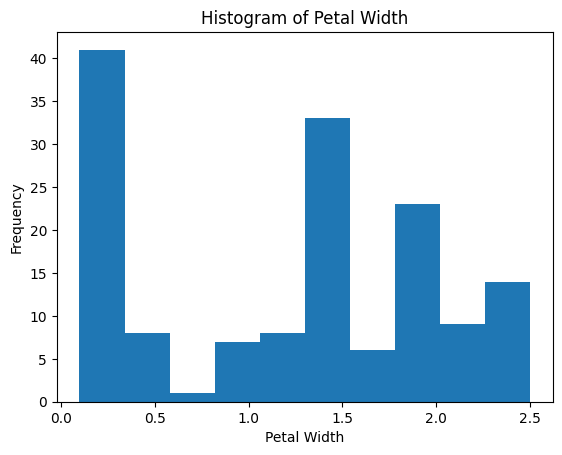

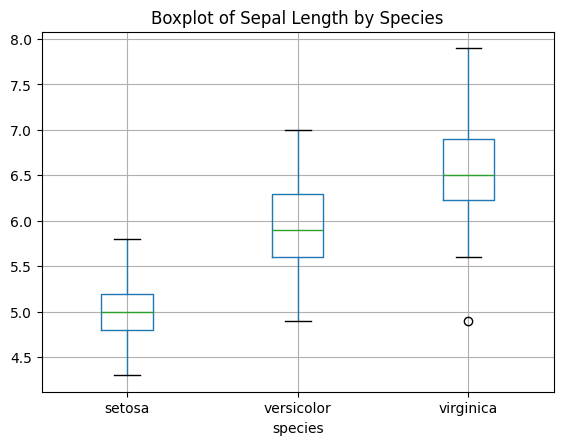

In [4]:
# 3.Visualization
plt.hist(df["petal_width"])
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title("Histogram of Petal Width")
plt.show()

df.boxplot(column ="sepal_length", by ="species")
plt.title("Boxplot of Sepal Length by Species")
plt.suptitle("")
plt.show()


In [5]:

# 4.Distributions & Skewness
skewness = df.groupby("species", observed=False)["petal_length"].apply(stats.skew)
print("Skewness of Petal Length by Species:")
print(skewness.to_string())

print("\nMost positively skewed:", skewness.idxmax())
print("Most negatively skewed:", skewness.idxmin())

Skewness of Petal Length by Species:
species
setosa        0.103175
versicolor   -0.588159
virginica     0.532822

Most positively skewed: virginica
Most negatively skewed: versicolor


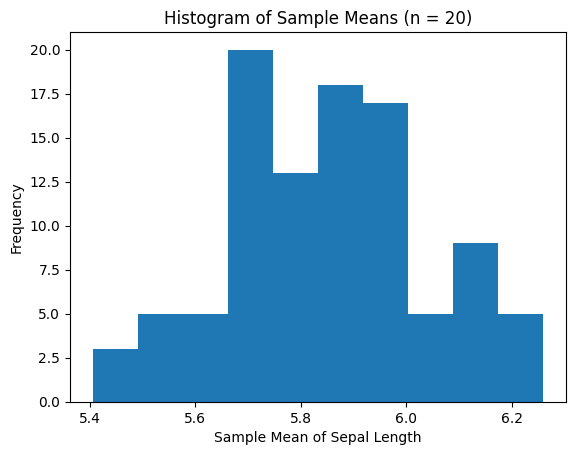

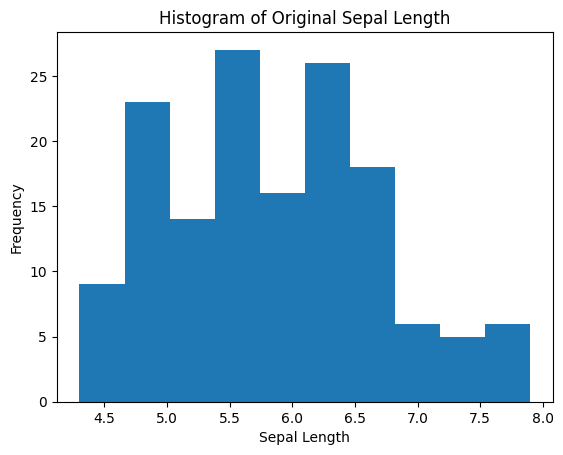

In [6]:

# 5.Sampling & Central Limit Theorem
np.random.seed(0)
sample_means = [df["sepal_length"].sample(20, replace=True).mean() for _ in range(100)]

# Histogram of sample means
plt.hist(sample_means)
plt.xlabel("Sample Mean of Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Means (n = 20)")
plt.show()

# Histogram of original sepal length
plt.hist(df["sepal_length"])
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Original Sepal Length")
plt.show()


Pearson correlation (r): 0.8717537758865831


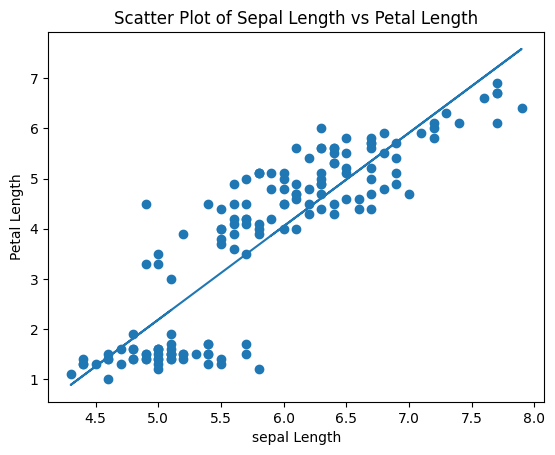

In [7]:

# 6.Correlation
# Computing Pearson correlation(r)
r, p = stats.pearsonr(df["sepal_length"], df["petal_length"])
print("Pearson correlation (r):", r)

# Scatter plot with best-fit line
plt.scatter(df["sepal_length"], df["petal_length"])
m, b = np.polyfit(df["sepal_length"], df["petal_length"], 1)
plt.plot(df["sepal_length"], m*df["sepal_length"] + b)
plt.xlabel("sepal Length")
plt.ylabel("Petal Length")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.show()

In [8]:
# 7.Hypothesis Testing: t-Test
# Extracting the petal length for the two species
setosa = df[df["species"] == "setosa"]["petal_length"]
versicolor = df[df["species"] == "versicolor"]["petal_length"]

# Independent t-test
t_stat, p_val = stats.ttest_ind(setosa, versicolor)

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -39.492719391538095
p-value: 5.404910513441677e-62


In [9]:
# 8.Hypothesis Testing: ANOVA
# Extracting the petal width for each species
setosa = df[df["species"] == "setosa"]["petal_width"]
versicolor = df[df["species"] == "versicolor"]["petal_width"]
virginica = df[df["species"] == "virginica"]["petal_width"]

# ANOVA
f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 960.0071468018067
p-value: 4.169445839443833e-85
